[0.20206871 0.13494451 0.2935035  0.00463043 0.55272002]
[0.33678118 0.33678118 0.36687938 0.02315215 0.55272002]


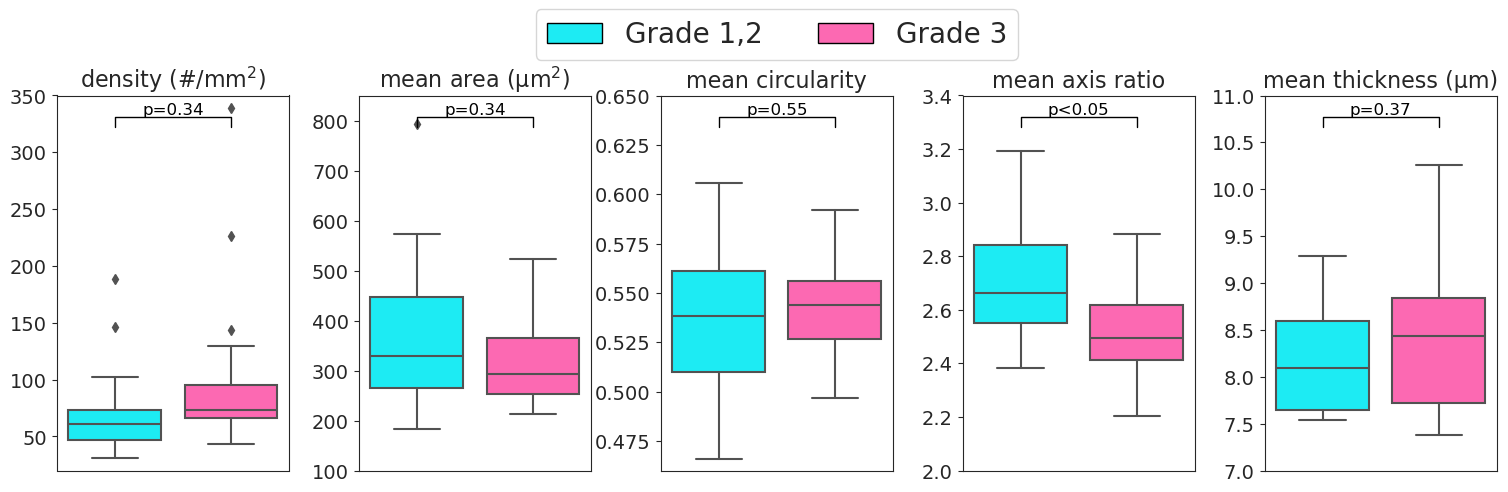

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.gridspec as gridspec
from numpy import genfromtxt
from scipy.stats import ttest_ind
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Patch
#from multipy.fdr import lsu
from statsmodels.stats.multitest import fdrcorrection
import numpy as np

# sns.set(style="whitegrid")
sns.set_style("ticks", {'axes.grid' : False})

my_pal = {0: (29/256.0, 236/256.0, 244/256.0), 1: (253/256.0, 105/256.0, 179/256.0)}

fig = plt.figure(figsize=(15,5), constrained_layout=False)
gs = gridspec.GridSpec(nrows=1, 
                       ncols=5, 
                       figure=fig,
                       wspace=0.3,
                       hspace=0.15)

# counts = pd.read_csv("tumor_vascular_parameters/tumor_vascular_parameters_small.csv")
# classes = pd.read_csv("tumor_vascular_parameters/NodeStatusAndGradeERPos.csv")
# counts['Grade'] = classes['Grade']


#counts = pd.read_csv("measurements/tumor_vascular_parameters_test_8.csv", dtype={'Name': 'string'})
counts = pd.read_csv("measurements/measurements_vessel_full_slide.csv", dtype={'Name': 'string'})
classes = pd.read_csv("measurements/NodeStatusAndGradeERPos.csv", dtype={'Name': 'string'})
counts["Grade"] = np.nan

for index, row in classes.iterrows():
    for index2, row2 in counts.iterrows():
        if row['Name'][:-4] == str(row2['Name']):
            counts.loc[index2, 'Grade'] = row['Grade']

counts = counts[counts['region'] == 'tumor']
counts = counts.drop(counts[counts['Grade'].isna()].index)

# print(counts)



cat1 = counts[counts['Grade']==0]['density']
cat2 = counts[counts['Grade']==1]['density']
t, p1 = ttest_ind(cat1, cat2, axis=0, nan_policy='propagate')
cat1 = counts[counts['Grade']==0]['mean_area']
cat2 = counts[counts['Grade']==1]['mean_area']
t, p2 = ttest_ind(cat1, cat2, axis=0, nan_policy='propagate')
cat1 = counts[counts['Grade']==0]['mean_thickness']
cat2 = counts[counts['Grade']==1]['mean_thickness']
t, p3 = ttest_ind(cat1, cat2, axis=0, nan_policy='propagate')
cat1 = counts[counts['Grade']==0]['mean_axis_ratio']
cat2 = counts[counts['Grade']==1]['mean_axis_ratio']
t, p4 = ttest_ind(cat1, cat2, axis=0, nan_policy='propagate')
cat1 = counts[counts['Grade']==0]['mean_circularity']
cat2 = counts[counts['Grade']==1]['mean_circularity']
t, p5 = ttest_ind(cat1, cat2, axis=0, nan_policy='propagate')

# https://towardsdatascience.com/multiple-hypothesis-testing-correction-for-data-scientist-46d3a3d1611d
# https://www.statsmodels.org/stable/generated/statsmodels.stats.multitest.fdrcorrection.html
pvals = np.array([p1, p2, p3, p4, p5])
rejected, pvals_corrected = fdrcorrection(pvals, alpha=0.05, method='indep', is_sorted=False)
p1 = pvals_corrected[0]
p2 = pvals_corrected[1]
p3 = pvals_corrected[2]
p4 = pvals_corrected[3]
p5 = pvals_corrected[4]
print(pvals)
print(pvals_corrected)


ax = fig.add_subplot(gs[0, 0])
ax = sns.boxplot(x='Grade', y='density', palette=my_pal, data=counts, saturation=1)
ax.set(ylabel="", xlabel="")
ax.set(xticklabels=[])
ax.set_title('density (#/mm$^2$)', fontsize=16)
x1, x2 = 0, 1 
plt.ylim((20,350))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ymin, ymax = ax.get_ylim()
diff = ymax - ymin
y, h, col = ymax - diff/12, diff/40, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
if p1 < 0.05:
    plt.text((x1+x2)*.5, y+h, "p<0.05", ha='center', va='bottom', color=col, fontsize=12)
else:
    plt.text((x1+x2)*.5, y+h, "p={:.2f}".format(p1), ha='center', va='bottom', color=col, fontsize=12)



ax2 = fig.add_subplot(gs[0, 1])
ax2 = sns.boxplot(x='Grade', y='mean_area', palette=my_pal, data=counts, saturation=1)
ax2.set(ylabel="", xlabel="")
ax2.set(xticklabels=[])
ax2.set_title('mean area (μm$^2$)', fontsize=16)
x1, x2 = 0, 1 
plt.ylim((100,850))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ymin, ymax = ax2.get_ylim()
diff = ymax - ymin
y, h, col = ymax - diff/12, diff/40, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
if p2 < 0.05:
    plt.text((x1+x2)*.5, y+h, "p<0.05", ha='center', va='bottom', color=col, fontsize=12)
else:
    plt.text((x1+x2)*.5, y+h, "p={:.2f}".format(p2), ha='center', va='bottom', color=col, fontsize=12)


ax5 = fig.add_subplot(gs[0, 2])
ax5 = sns.boxplot(x='Grade', y='mean_circularity', palette=my_pal, data=counts, saturation=1)
ax5.set(ylabel="", xlabel="")
ax5.set(xticklabels=[])
ax5.set_title('mean circularity', fontsize=16)
x1, x2 = 0, 1 
plt.ylim((0.46,0.65))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ymin, ymax = ax5.get_ylim()
diff = ymax - ymin
y, h, col = ymax - diff/12, diff/40, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
if p5 < 0.05:
    plt.text((x1+x2)*.5, y+h, "p<0.05", ha='center', va='bottom', color=col, fontsize=12)
else:
    plt.text((x1+x2)*.5, y+h, "p={:.2f}".format(p5), ha='center', va='bottom', color=col, fontsize=12)

    
ax4 = fig.add_subplot(gs[0, 3])
ax4 = sns.boxplot(x='Grade', y='mean_axis_ratio', palette=my_pal, data=counts, saturation=1)
ax4.set(ylabel="", xlabel="")
ax4.set(xticklabels=[])
ax4.set_title('mean axis ratio', fontsize=16)
x1, x2 = 0, 1
plt.ylim((2,3.4))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ymin, ymax = ax4.get_ylim()
diff = ymax - ymin
y, h, col = ymax - diff/12, diff/40, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
if p4 < 0.05:
    plt.text((x1+x2)*.5, y+h, "p<0.05", ha='center', va='bottom', color=col, fontsize=12)
else:
    plt.text((x1+x2)*.5, y+h, "p={:.2f}".format(p4), ha='center', va='bottom', color=col, fontsize=12)


ax3 = fig.add_subplot(gs[0, 4])
ax3 = sns.boxplot(x='Grade', y='mean_thickness', palette=my_pal, data=counts, saturation=1)
ax3.set(ylabel="", xlabel="")
ax3.set(xticklabels=[])
ax3.set_title('mean thickness (μm)', fontsize=16)
x1, x2 = 0, 1
plt.ylim((7,11))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ymin, ymax = ax3.get_ylim()
diff = ymax - ymin
y, h, col = ymax - diff/12, diff/40, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
if p3 < 0.05:
    plt.text((x1+x2)*.5, y+h, "p<0.05", ha='center', va='bottom', color=col, fontsize=12)
else:
    plt.text((x1+x2)*.5, y+h, "p={:.2f}".format(p3), ha='center', va='bottom', color=col, fontsize=12)




legend_elements = [Patch(facecolor=(29/256.0, 236/256.0, 244/256.0), edgecolor='black', label='Grade 1,2'),
                   Patch(facecolor=(253/256.0, 105/256.0, 179/256.0), edgecolor='black', label='Grade 3')]
fig.legend(handles=legend_elements, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1), prop={'size': 20, 'weight':'normal'})


plt.subplots_adjust(top = 0.8, bottom = 0.05, right = 0.98, left = 0.02)

for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
for item in ([ax2.xaxis.label, ax2.yaxis.label] + ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(14)
for item in ([ax3.xaxis.label, ax3.yaxis.label] + ax3.get_xticklabels() + ax3.get_yticklabels()):
    item.set_fontsize(14)
for item in ([ax4.xaxis.label, ax4.yaxis.label] + ax4.get_xticklabels() + ax4.get_yticklabels()):
    item.set_fontsize(14)
for item in ([ax5.xaxis.label, ax5.yaxis.label] + ax5.get_xticklabels() + ax5.get_yticklabels()):
    item.set_fontsize(14)


plt.show()
fig.savefig("measurements/boxplot_grade.pdf", bbox_inches = 'tight')
